Finding optimal boxes for yolo with using clustering on coco dataset objects

In [31]:
# anchors = anchor1_width, anchor1_height, anchor2_width, anchor2_height, ..., anchorN_width, anchorN_height

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

Load data

In [2]:
train_path = "annotations_trainval2017/annotations/instances_val2017.json"
image_path = "val2017/"
with open(train_path,"r") as ftr:
    trlabel = json.load(ftr)
w = []
h = []

for annotation in trlabel["annotations"]:
    bbox = annotation["bbox"]
    w.append(bbox[2])
    h.append(bbox[3])

In [3]:
# process width and height to input data for kmeans clustering
w=np.asarray(w)
h=np.asarray(h)

x=[w,h]
x=np.asarray(x)
x=x.transpose()

In [4]:
from sklearn.cluster import KMeans
def clusterization(x, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(x)
    y_kmeans = kmeans.predict(x)

    centers = kmeans.cluster_centers_
    return y_kmeans, centers

In [5]:
def draw_clusters(x, y, centers, label):
    plt.scatter(x[:, 0], x[:, 1], c=y, s=2, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
    plt.title("%s %s clusters" % (label, len(centers)))
    plt.show()

Yolo prediction on "MS COCO 2017 Val images"

In [6]:
import pandas as pd

file = "bboxes.csv"
dataframe = pd.read_csv(file, names=["w", "h"], delimiter=" ")


In [7]:
yolo_w=np.asarray(dataframe["w"])
yolo_h=np.asarray(dataframe["h"])

yolo_x=[yolo_w,yolo_h]
yolo_x=np.asarray(yolo_x)
yolo_x=yolo_x.transpose()

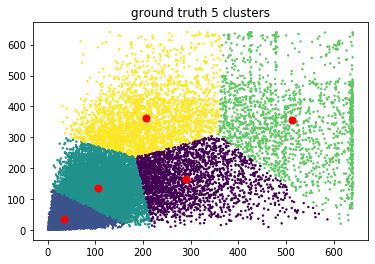

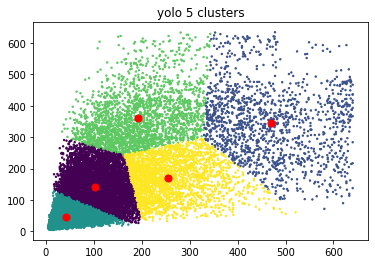

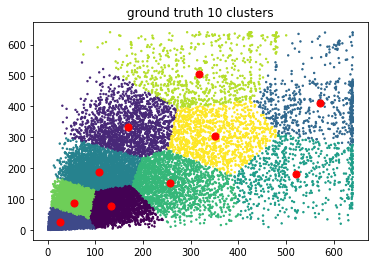

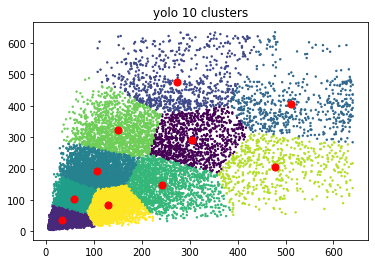

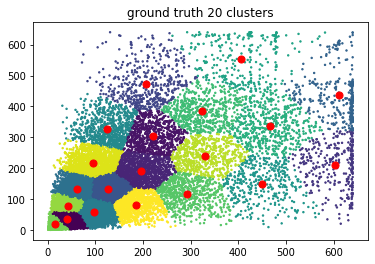

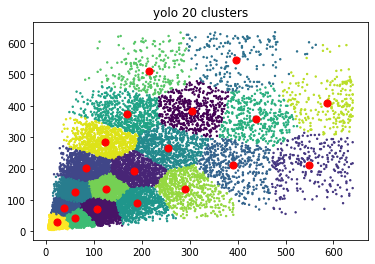

In [8]:
clusters_cnts = [5, 10, 20]
for clusters_cnt in clusters_cnts:
    y, centers = clusterization(x, n_clusters=clusters_cnt)
    draw_clusters(x, y, centers, label = "ground truth")

    yolo_y, yolo_centers = clusterization(yolo_x, n_clusters=clusters_cnt)
    draw_clusters(yolo_x, yolo_y, yolo_centers, label = "yolo")
